In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.linear_model import LinearRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('comments.csv')
df

,user,nationality,current_location,comment_date,comment
0,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-22,"In the fifa website, says November 21- Decembe..."
1,mazinio,NaN,NaN,2021-10-23,Where can u aee that. Can u please share the l...
2,Paul Calixte,NaN,"Miami, FL",2021-10-23,"Hi everyone,\n\nWith the incoming proliferatio..."
3,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,"I spoke too soon, it says it will be available..."
4,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,https://www.fifa.com/tournaments/mens/worldcup...
...,...,...,...,...,...
17956,Itiofele,Peru,"Lima, Peru",2022-09-28,Finally I have finished to see all the seat I ...
17957,milan24_2000,NaN,"Auckland, NZ",2022-09-28,"I wish they are not finalize, it give me hope ..."
17958,Gane,NaN,NaN,2022-09-28,"The seats are set in stone, supporters, TST's ..."
17959,whiskerxx,NaN,NaN,2022-09-28,With all this talk about the location of seats...


In [3]:
senti_analyzer = SentimentIntensityAnalyzer()

def review_sentiment(review):
    review = str(review)
    score = senti_analyzer.polarity_scores(review)
    return score["compound"]

In [4]:
df["sentiment_score"] = df['comment'].map(review_sentiment)
df["sentiment_score"]

0        0.0000
1        0.5423
2        0.6114
3        0.4199
4        0.0000
          ...  
17956    0.6369
17957    0.8176
17958    0.6705
17959    0.4404
17960    0.5480
Name: sentiment_score, Length: 17961, dtype: float64

In [5]:
df['current_location'].value_counts()

Los Angeles, CA          1304
Doha, Qatar               526
dublin                    325
Northern Ireland          317
ITALY                     273
                         ... 
Wheaton, Maryland           1
Brasília                    1
Memphis                     1
kaKaLak                     1
Auckland, New Zealand       1
Name: current_location, Length: 110, dtype: int64

In [6]:
df2 = pd.read_csv('final_comments_LDA.csv')
df2.head()

,Unnamed: 0,Document_No,General_Conversation_TC,Accomodation_and_Venue_TC,Tickets_TC,Seating_TC,Matches_TC,dominant_topic,user,nationality,current_location,comment_date,comment,Text,sentiment_score,Country
0,0,1,0.0184,0.3374,0.0189,0.0183,0.6070,Matches,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-22,"In the fifa website, says November 21- Decembe...","['fifa', 'website', 'says', 'november', '21', ...",0.0000,US
1,1,2,0.0289,0.0290,0.8844,0.0289,0.0288,Tickets,mazinio,NaN,NaN,2021-10-23,Where can u aee that. Can u please share the l...,"['u', 'see', 'u', 'please', 'share', 'link']",0.5423,NaN
2,2,3,0.2211,0.2656,0.1526,0.0422,0.3184,Matches,Paul Calixte,NaN,"Miami, FL",2021-10-23,"Hi everyone,\n\nWith the incoming proliferatio...","['hi', 'everyone', 'incoming', 'proliferation'...",0.6114,US
3,3,4,0.1515,0.0145,0.0148,0.0144,0.8048,Matches,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,"I spoke too soon, it says it will be available...","['spoke', 'soon', 'says', 'available', 'due', ...",0.4199,US
4,4,5,0.1000,0.1000,0.6000,0.1000,0.1000,Tickets,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,https://www.fifa.com/tournaments/mens/worldcup...,['https://www.fifa.com/tournaments/mens/worldc...,0.0000,US


In [7]:
def find_sentiment(sentiment_score):
    if sentiment_score >= 0.05 :
        return "Positive"
 
    elif sentiment_score <= - 0.05 :
        return "Negative"
 
    else :
        return "Neutral"

In [8]:
df2['sentiment_type'] = df2['sentiment_score'].map(find_sentiment)
df2.head()

,Unnamed: 0,Document_No,General_Conversation_TC,Accomodation_and_Venue_TC,Tickets_TC,Seating_TC,Matches_TC,dominant_topic,user,nationality,current_location,comment_date,comment,Text,sentiment_score,Country,sentiment_type
0,0,1,0.0184,0.3374,0.0189,0.0183,0.6070,Matches,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-22,"In the fifa website, says November 21- Decembe...","['fifa', 'website', 'says', 'november', '21', ...",0.0000,US,Neutral
1,1,2,0.0289,0.0290,0.8844,0.0289,0.0288,Tickets,mazinio,NaN,NaN,2021-10-23,Where can u aee that. Can u please share the l...,"['u', 'see', 'u', 'please', 'share', 'link']",0.5423,NaN,Positive
2,2,3,0.2211,0.2656,0.1526,0.0422,0.3184,Matches,Paul Calixte,NaN,"Miami, FL",2021-10-23,"Hi everyone,\n\nWith the incoming proliferatio...","['hi', 'everyone', 'incoming', 'proliferation'...",0.6114,US,Positive
3,3,4,0.1515,0.0145,0.0148,0.0144,0.8048,Matches,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,"I spoke too soon, it says it will be available...","['spoke', 'soon', 'says', 'available', 'due', ...",0.4199,US,Positive
4,4,5,0.1000,0.1000,0.6000,0.1000,0.1000,Tickets,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,https://www.fifa.com/tournaments/mens/worldcup...,['https://www.fifa.com/tournaments/mens/worldc...,0.0000,US,Neutral


In [9]:
sentiment_ohe = pd.get_dummies(df2['sentiment_type'])

In [10]:
df2 = df2.join(sentiment_ohe)
df2.head()

,Unnamed: 0,Document_No,General_Conversation_TC,Accomodation_and_Venue_TC,Tickets_TC,Seating_TC,Matches_TC,dominant_topic,user,nationality,current_location,comment_date,comment,Text,sentiment_score,Country,sentiment_type,Negative,Neutral,Positive
0,0,1,0.0184,0.3374,0.0189,0.0183,0.6070,Matches,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-22,"In the fifa website, says November 21- Decembe...","['fifa', 'website', 'says', 'november', '21', ...",0.0000,US,Neutral,0,1,0
1,1,2,0.0289,0.0290,0.8844,0.0289,0.0288,Tickets,mazinio,NaN,NaN,2021-10-23,Where can u aee that. Can u please share the l...,"['u', 'see', 'u', 'please', 'share', 'link']",0.5423,NaN,Positive,0,0,1
2,2,3,0.2211,0.2656,0.1526,0.0422,0.3184,Matches,Paul Calixte,NaN,"Miami, FL",2021-10-23,"Hi everyone,\n\nWith the incoming proliferatio...","['hi', 'everyone', 'incoming', 'proliferation'...",0.6114,US,Positive,0,0,1
3,3,4,0.1515,0.0145,0.0148,0.0144,0.8048,Matches,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,"I spoke too soon, it says it will be available...","['spoke', 'soon', 'says', 'available', 'due', ...",0.4199,US,Positive,0,0,1
4,4,5,0.1000,0.1000,0.6000,0.1000,0.1000,Tickets,Danny Ascencio,Argentina,"Dallas, Texas",2021-10-25,https://www.fifa.com/tournaments/mens/worldcup...,['https://www.fifa.com/tournaments/mens/worldc...,0.0000,US,Neutral,0,1,0


In [11]:
df2['Country'].value_counts()

US    4148
GB     637
QA     526
IE     442
AU     426
IT     380
CA     347
DE     156
AR     129
LB     126
PE     116
NZ     114
BR      54
JP      30
SA      25
NL      25
MX      18
ZA      10
CL       6
AT       2
TR       1
CH       1
PH       1
Name: Country, dtype: int64

In [12]:
df_country_sentiments = df2.groupby('Country')['Negative','Neutral','Positive'].sum()
df_country_sentiments

,Negative,Neutral,Positive
Country,,,
AR,20.0,50.0,59.0
AT,0.0,0.0,2.0
AU,81.0,105.0,240.0
BR,6.0,15.0,33.0
CA,63.0,100.0,184.0
CH,0.0,1.0,0.0
CL,1.0,1.0,4.0
DE,32.0,51.0,73.0
GB,121.0,259.0,257.0


In [13]:
def make_pie_charts(x):
    colors = ['#c08497','#F7AF9D','#F7E3AF']
    y = np.array(df_country_sentiments.loc[x])
    labels1 = df_country_sentiments.columns
    plt.pie(y, labels = labels1,colors=colors)
    plt.title(str(x))
    plt.show()

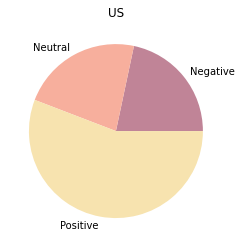

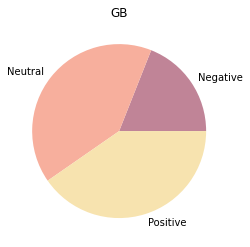

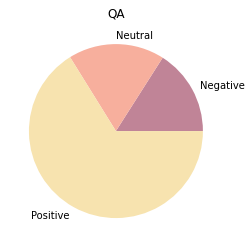

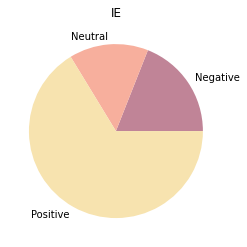

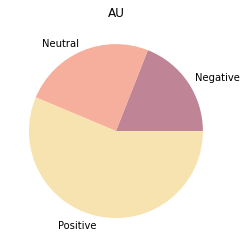

In [14]:
country_codes = df2['Country'].value_counts().index[:5]

for i in country_codes:
    make_pie_charts(i)

In [15]:
df_odds = df2[df2['Country'].map(lambda c : c in df2['Country'].value_counts().iloc[:5])].groupby(['Country','dominant_topic'])[['Negative','Positive']].sum()

df_odds

Negative  Positive
Country dominant_topic                            
AU      Accomodation_and_Venue      16.0      62.0
        General_Conversation        26.0      59.0
        Matches                      9.0      37.0
        Seating                      9.0      25.0
        Tickets                     21.0      57.0
GB      Accomodation_and_Venue      35.0      52.0
        General_Conversation        17.0      58.0
        Matches                     22.0      51.0
        Seating                     11.0      28.0
        Tickets                     36.0      68.0
IE      Accomodation_and_Venue      18.0      60.0
        General_Conversation        15.0      59.0
        Matches                      7.0      61.0
        Seating                      4.0      23.0
        Tickets                     40.0      90.0
QA      Accomodation_and_Venue      25.0     129.0
        General_Conversation        20.0      84.0
        Matches                     15.0      57.0
        Seating                     10.0      21.0
        Tickets                     14.0      57.0
US      Accomodation_and_Venue     191.0     544.0
        General_Conversation       232.0     672.0
        Matches                    146.0     396.0
        Seating                     95.0     199.0
        Tickets                    235.0     505.0

In [16]:
df_odds['Odds_Pos'] = df_odds['Positive'] / df_odds['Negative']
df_odds['Odds_Neg'] = df_odds['Negative'] / df_odds['Positive']
df_odds

Negative  Positive  Odds_Pos  Odds_Neg
Country dominant_topic                                                
AU      Accomodation_and_Venue      16.0      62.0  3.875000  0.258065
        General_Conversation        26.0      59.0  2.269231  0.440678
        Matches                      9.0      37.0  4.111111  0.243243
        Seating                      9.0      25.0  2.777778  0.360000
        Tickets                     21.0      57.0  2.714286  0.368421
GB      Accomodation_and_Venue      35.0      52.0  1.485714  0.673077
        General_Conversation        17.0      58.0  3.411765  0.293103
        Matches                     22.0      51.0  2.318182  0.431373
        Seating                     11.0      28.0  2.545455  0.392857
        Tickets                     36.0      68.0  1.888889  0.529412
IE      Accomodation_and_Venue      18.0      60.0  3.333333  0.300000
        General_Conversation        15.0      59.0  3.933333  0.254237
        Matches                      7.0      61.0  8.714286  0.114754
        Seating                      4.0      23.0  5.750000  0.173913
        Tickets                     40.0      90.0  2.250000  0.444444
QA      Accomodation_and_Venue      25.0     129.0  5.160000  0.193798
        General_Conversation        20.0      84.0  4.200000  0.238095
        Matches                     15.0      57.0  3.800000  0.263158
        Seating                     10.0      21.0  2.100000  0.476190
        Tickets                     14.0      57.0  4.071429  0.245614
US      Accomodation_and_Venue     191.0     544.0  2.848168  0.351103
        General_Conversation       232.0     672.0  2.896552  0.345238
        Matches                    146.0     396.0  2.712329  0.368687
        Seating                     95.0     199.0  2.094737  0.477387
        Tickets                    235.0     505.0  2.148936  0.465347

In [17]:
def find_max_min(country):
    s = df_odds.loc[country].idxmax(axis=0)[["Odds_Pos", "Odds_Neg"]]
    df_temp = pd.DataFrame(
        [],
        columns=['Country', 'Most_positive_topic', 'Positive_Odds', 'Most_negative_topic', 'Negative_Odds'])
    row = {
        'Country': country,
        'Most_positive_topic': '',
        'Positive_Odds': '',
        'Most_negative_topic': '',
        'Negative_Odds': ''
    }

    for idx in s.index:
        if idx == 'Odds_Pos':
            row['Most_positive_topic'] = s[idx]
            row['Positive_Odds'] = df_odds.loc[country,s[idx]][idx]
        else:
            row['Most_negative_topic'] = s[idx]
            row['Negative_Odds'] = df_odds.loc[country,s[idx]][idx]
    df_temp.loc[len(df_temp)] = row
    return df_temp

In [18]:
df_country_topic_odds = pd.DataFrame()
for i in country_codes:
    df_country_topic_odds = df_country_topic_odds.append(find_max_min(i))

In [19]:
df_country_topic_odds

,Country,Most_positive_topic,Positive_Odds,Most_negative_topic,Negative_Odds
0,US,General_Conversation,2.896552,Seating,0.477387
0,GB,General_Conversation,3.411765,Accomodation_and_Venue,0.673077
0,QA,Accomodation_and_Venue,5.160000,Seating,0.476190
0,IE,Matches,8.714286,Tickets,0.444444
0,AU,Matches,4.111111,General_Conversation,0.440678


In [20]:
y = df_country_topic_odds['Country']
x1 = (df_country_topic_odds['Positive_Odds'])
x2 = -1 * (df_country_topic_odds['Negative_Odds'])

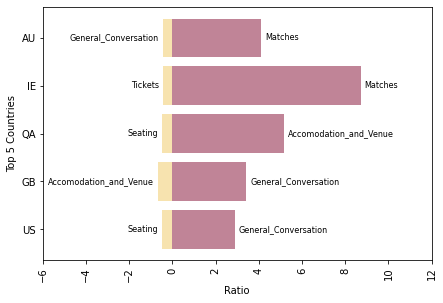

In [21]:
fig, ax = plt.subplots()
hb1 = ax.barh(y, x1, color = ['#c08497'])
hb2 = ax.barh(y, x2, color = ['#F7E3AF'])

# Formatting x labels
plt.xticks(rotation=90)
plt.tight_layout()

ticks =  ax.get_yticks()
ax.set_yticklabels(df_country_topic_odds['Country'])

ax.bar_label(hb1,labels=df_country_topic_odds['Most_positive_topic'],fontsize=8,padding=4)
ax.bar_label(hb2,labels=df_country_topic_odds['Most_negative_topic'],fontsize=8,padding=4)

ax.set_xlim(left=-6,right=12)

plt.xlabel('Ratio')
plt.ylabel('Top 5 Countries')


plt.show()